In [1]:
! pip install koreanize-matplotlib
import koreanize_matplotlib


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\HOME\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
customer= pd.read_csv('./Customer_data.csv')
expert_Data= pd.read_csv('./Expert_Data.csv')
Log_Data02= pd.read_csv('./Log_Data02.csv')
Service_Data= pd.read_csv('./Service_Data.csv')

#### 고객 정보 데이터

In [4]:
customer.head()

,고객ID,사용기기,사용OS,유입경로,회원상태,거주지,연령,성별,서비스총구매수,총구매금액,총수정요청수,총추가결제금액
0,1001010041,iPhone,iOS11.4.1,유튜브,정상회원,경기도,25.0,남성,1,44500.0,0.0,14500
1,10010100410,SM-N935S,Android7.0,검색광고,정상회원,경기도,26.0,NaN,1,44500.0,0.0,14500
2,100101004108,iPhone,iOS12.0,네이버블로그,정상회원,경기도,23.0,남성,1,34500.0,0.0,14500
3,100101004109,iPhone,iOS11.4.1,인스타그램,정상회원,경기도,20.0,남성,1,364500.0,0.0,14500
4,100101004112,iPhone,iOS11.4.1,직접검색,정상회원,경기도,28.0,남성,1,34500.0,0.0,14500


In [5]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137526 entries, 0 to 137525
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   고객ID     137526 non-null  int64  
 1   사용기기     137526 non-null  object 
 2   사용OS     137526 non-null  object 
 3   유입경로     135920 non-null  object 
 4   회원상태     137526 non-null  object 
 5   거주지      137526 non-null  object 
 6   연령       135722 non-null  float64
 7   성별       127267 non-null  object 
 8   서비스총구매수  137526 non-null  int64  
 9   총구매금액    137521 non-null  float64
 10  총수정요청수   137526 non-null  float64
 11  총추가결제금액  137526 non-null  int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 12.6+ MB


In [6]:
customer.isna().sum()

고객ID           0
사용기기           0
사용OS           0
유입경로        1606
회원상태           0
거주지            0
연령          1804
성별         10259
서비스총구매수        0
총구매금액          5
총수정요청수         0
총추가결제금액        0
dtype: int64

In [7]:
customer.shape

(137526, 12)

### 결측치 삭제

In [8]:
drop_df=customer.dropna()

In [9]:
drop_df.shape

(124107, 12)

In [10]:
drop_df.isna().sum()

고객ID       0
사용기기       0
사용OS       0
유입경로       0
회원상태       0
거주지        0
연령         0
성별         0
서비스총구매수    0
총구매금액      0
총수정요청수     0
총추가결제금액    0
dtype: int64

In [11]:
drop_df.drop('고객ID',axis=1,inplace=True)

In [12]:
drop_df.head()

,사용기기,사용OS,유입경로,회원상태,거주지,연령,성별,서비스총구매수,총구매금액,총수정요청수,총추가결제금액
0,iPhone,iOS11.4.1,유튜브,정상회원,경기도,25.0,남성,1,44500.0,0.0,14500
2,iPhone,iOS12.0,네이버블로그,정상회원,경기도,23.0,남성,1,34500.0,0.0,14500
3,iPhone,iOS11.4.1,인스타그램,정상회원,경기도,20.0,남성,1,364500.0,0.0,14500
4,iPhone,iOS11.4.1,직접검색,정상회원,경기도,28.0,남성,1,34500.0,0.0,14500
5,SM-G955N,Android8.0.0,검색광고,정상회원,경상도,26.0,남성,1,24500.0,0.0,14500


### 통계량

In [13]:
drop_df.describe().style.background_gradient(cmap='Blues')

,연령,서비스총구매수,총구매금액,총수정요청수,총추가결제금액
count,124107.000000,124107.000000,124107.000000,124107.000000,124107.000000
mean,27.692910,2.503936,157501.386384,0.434036,9890.871119
std,6.639086,3.986291,474528.232696,1.577121,18470.545795
min,0.000000,1.000000,0.000000,-6.000000,0.000000
25%,23.000000,1.000000,20200.000000,0.000000,0.000000
50%,26.000000,1.000000,53500.000000,0.000000,4200.000000
75%,31.000000,3.000000,131600.000000,0.000000,11400.000000
max,85.000000,96.000000,45052500.000000,120.000000,1445200.000000


In [14]:
# 연령대는 0~85세

In [15]:
drop_df.describe(include='O')

,사용기기,사용OS,유입경로,회원상태,거주지,성별
count,124107,124107,124107,124107,124107,124107
unique,243,45,10,3,7,2
top,iPhone,Android8.0.0,유튜브,정상회원,경기도,남성
freq,49643,44149,47537,119619,44098,91513


In [16]:
# 성별별로 가설 검정
# 회원 상태별 ..

### 이상치 제거 ( 연령 =0 세)

In [17]:
drop_df[drop_df['연령']==0]

,사용기기,사용OS,유입경로,회원상태,거주지,연령,성별,서비스총구매수,총구매금액,총수정요청수,총추가결제금액
839,SM-G930K,Android7.0,네이버블로그,정상회원,서울시,0.0,남성,8,90000.0,1.0,0
1658,SM-A520S,Android8.0.0,인스타그램,정상회원,경기도,0.0,여성,5,370000.0,4.0,0
3610,SM-G610S,Android7.0,유튜브,정상회원,전라도,0.0,남성,4,145000.0,1.0,10000
5116,SM-N960N,Android8.1.0,네이버카페,정상회원,서울시,0.0,남성,2,47000.0,2.0,4000
5944,LG-F700S,Android6.0.1,인스타그램,정상회원,경상도,0.0,남성,2,28000.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
131593,SM-G928K,Android7.0,유튜브,정상회원,경기도,0.0,여성,2,218200.0,0.0,18200
131842,iPhone,iOS10.3.3,다음카페,정상회원,경기도,0.0,여성,2,133200.0,0.0,8200
135051,SM-G950N,Android8.0.0,인스타그램,정상회원,서울시,0.0,여성,1,10000.0,0.0,0
135879,iPhone,iOS10.1.1,검색광고,정상회원,경기도,0.0,여성,2,19400.0,0.0,5400


In [18]:
drop_df=drop_df[drop_df['연령']!=0]

In [19]:
drop_df.shape

(123990, 11)

In [20]:
drop_df['연령'].describe()

count    123990.000000
mean         27.719042
std           6.587466
min          19.000000
25%          23.000000
50%          26.000000
75%          31.000000
max          85.000000
Name: 연령, dtype: float64

In [21]:
# 고객 특징

## 수치형/ 범주형 그래프

In [22]:
cat_col=drop_df.select_dtypes('object').columns

In [23]:
cat_col

Index(['사용기기', '사용OS', '유입경로', '회원상태', '거주지', '성별'], dtype='object')

In [24]:
num_col=drop_df.select_dtypes(['int64','float64']).columns

In [25]:
num_col

Index(['연령', '서비스총구매수', '총구매금액', '총수정요청수', '총추가결제금액'], dtype='object')

### 수치형 그래프

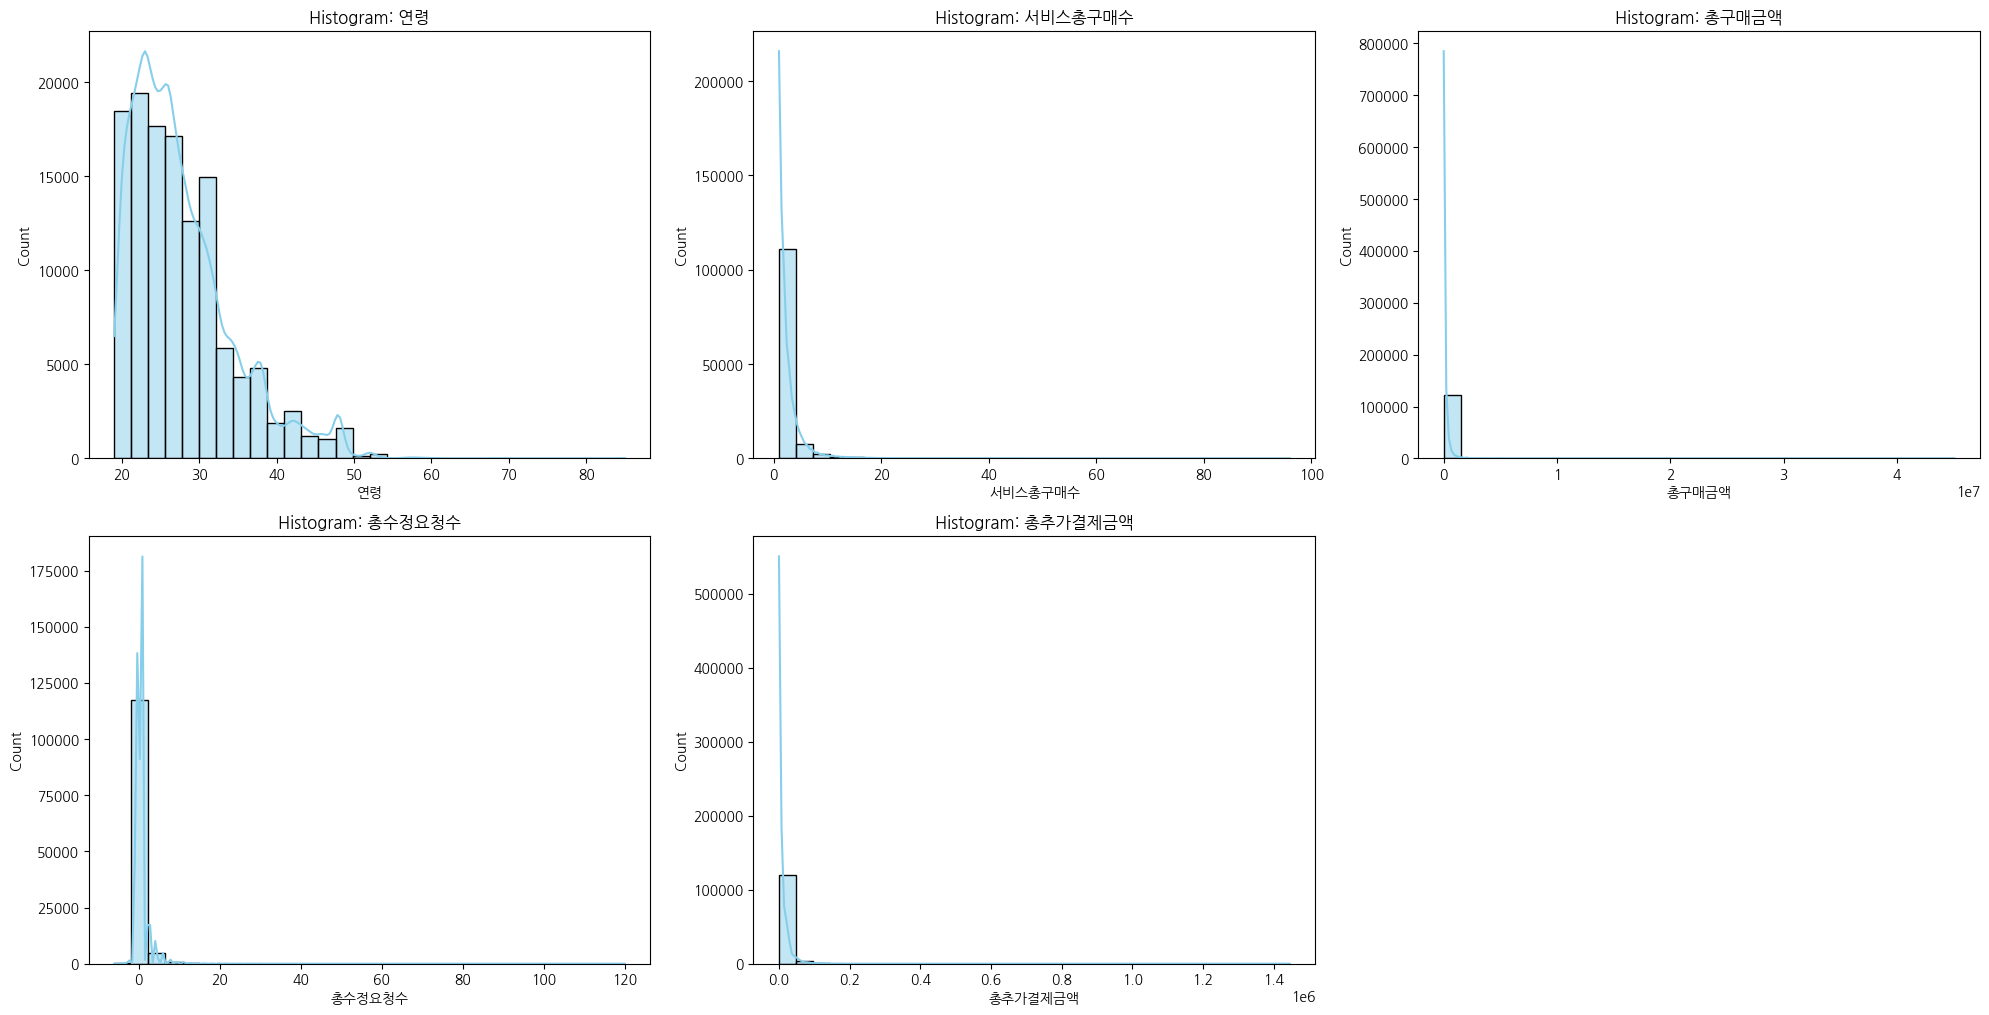

In [26]:
# 수치형
plt.figure(figsize=(20, 25))


for i, feature in enumerate(num_col, 1):
    plt.subplot(5, 3, i)
    sns.histplot(drop_df[feature], bins=30, kde=True, color='skyblue', edgecolor='black')
    plt.title("Histogram: " + feature)
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

### 범주형 그래프

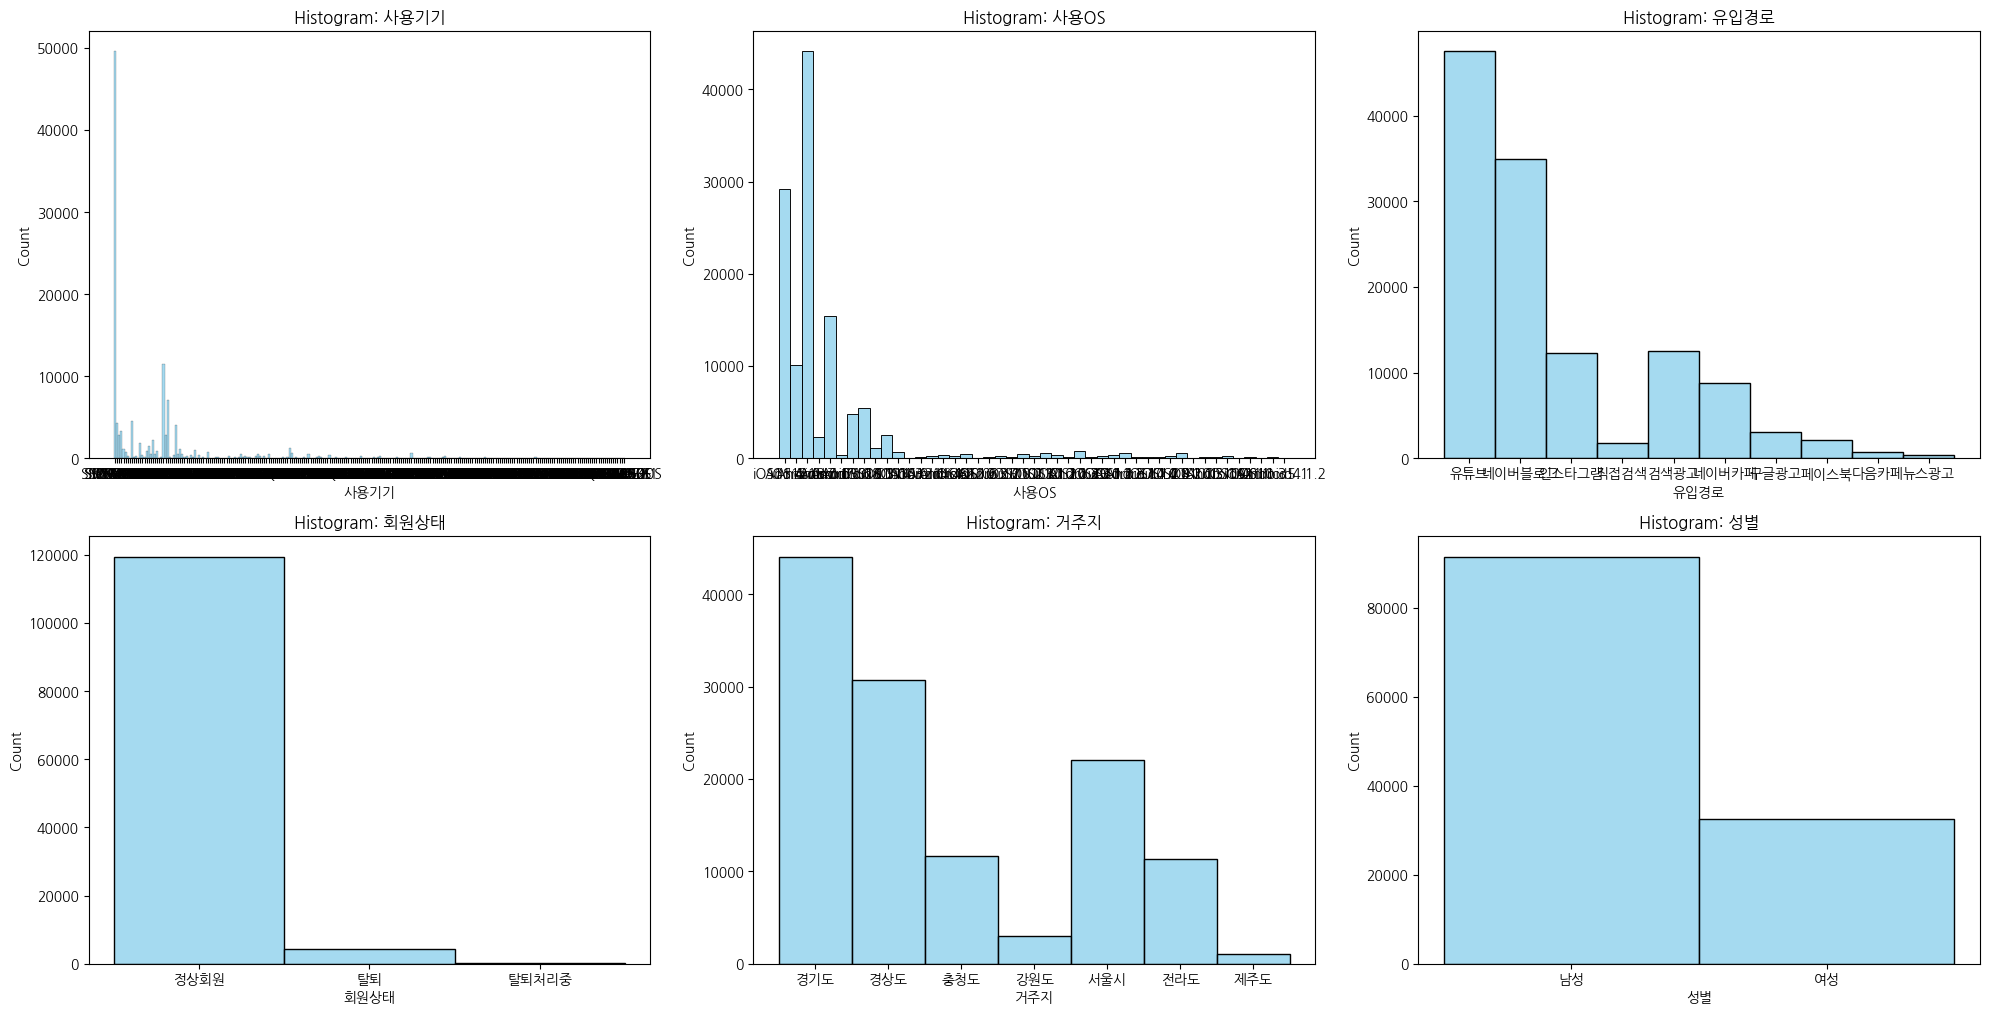

In [27]:
# 범주형

plt.figure(figsize=(20, 25))


for i, feature in enumerate(cat_col, 1):
    plt.subplot(5,3, i)
    sns.histplot(drop_df[feature], bins=30, color='skyblue', edgecolor='black')
    plt.title("Histogram: " + feature)
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

<Axes: xlabel='사용기기'>

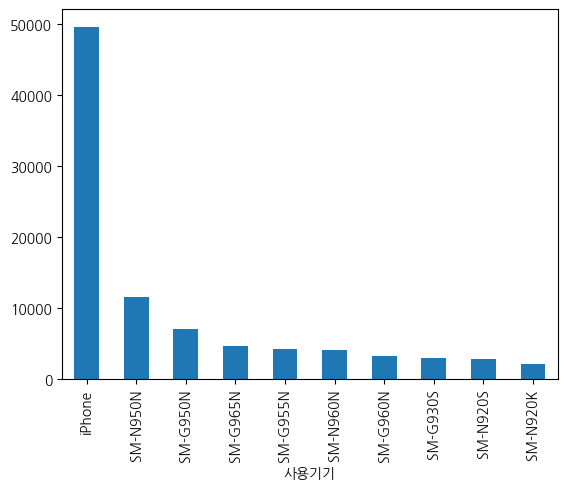

In [28]:
# 상위 10개 사용 기기

drop_df['사용기기'].value_counts().sort_values(ascending=False)[:10].plot.bar()

<Axes: xlabel='사용OS'>

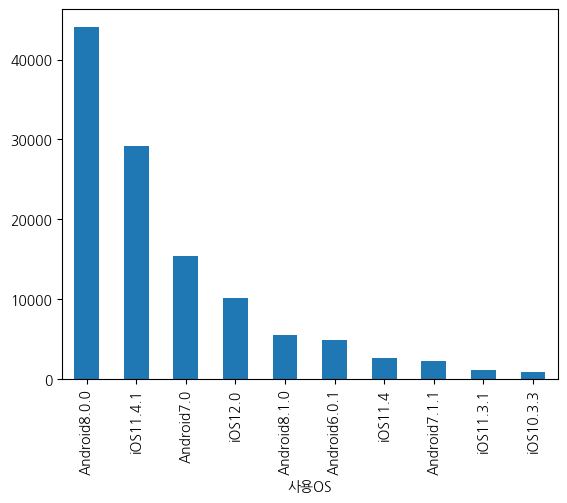

In [29]:
# 상위 10개의 사용OS

drop_df['사용OS'].value_counts().sort_values(ascending=False)[:10].plot.bar()

<Axes: xlabel='유입경로'>

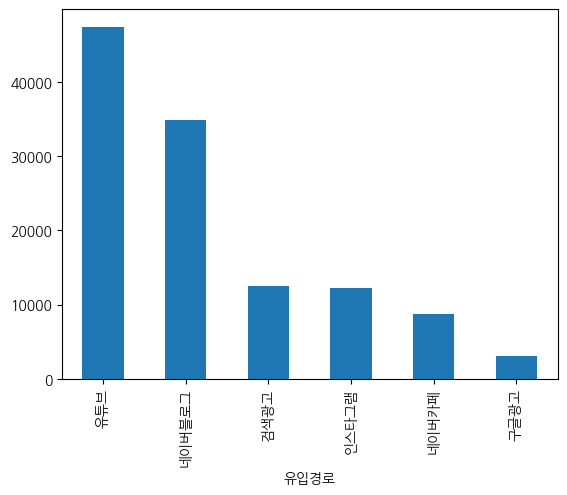

In [30]:
# 상위 5개의 유입경로

drop_df['유입경로'].value_counts().sort_values(ascending=False)[:6].plot.bar()

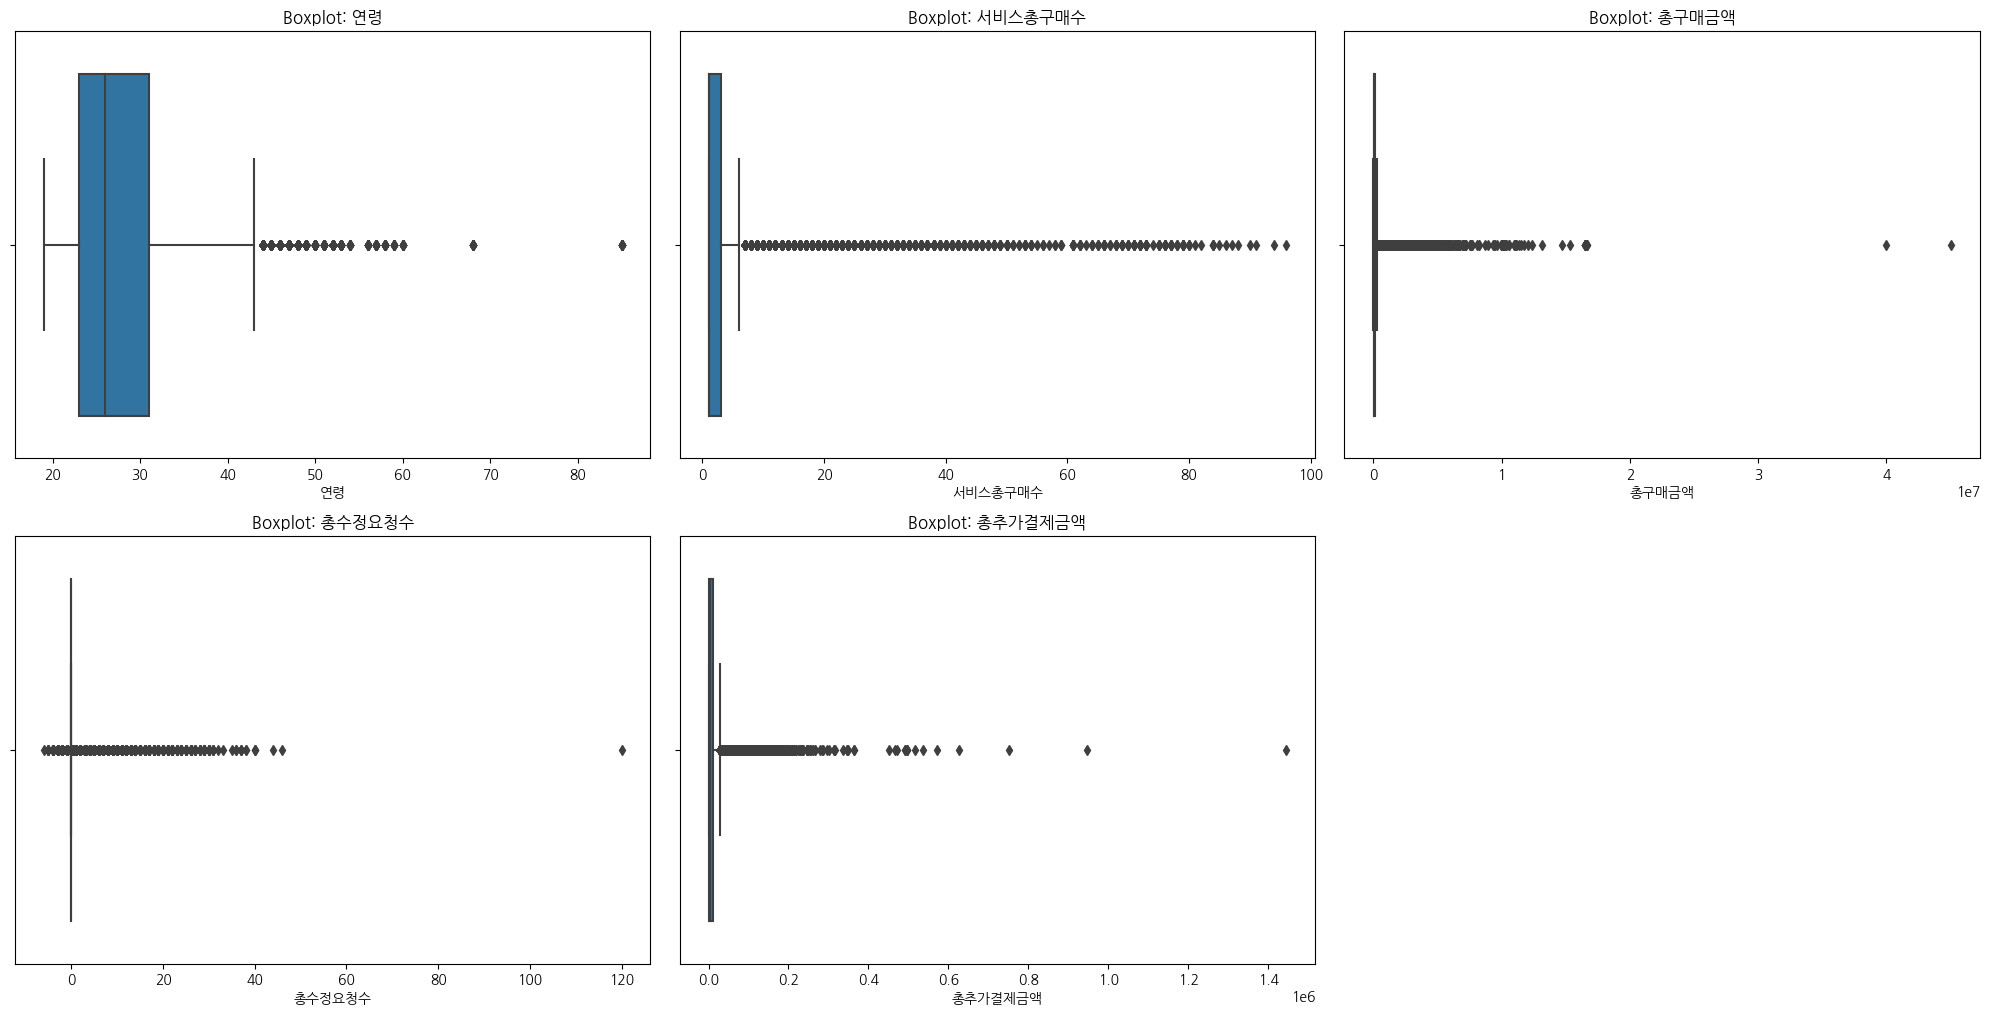

In [31]:
# box plot

plt.figure(figsize=(20, 25))


for i, feature in enumerate(num_col, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(data=drop_df, x=feature,hue='성별')
    plt.title("Boxplot: " + feature)
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

## 상관관계

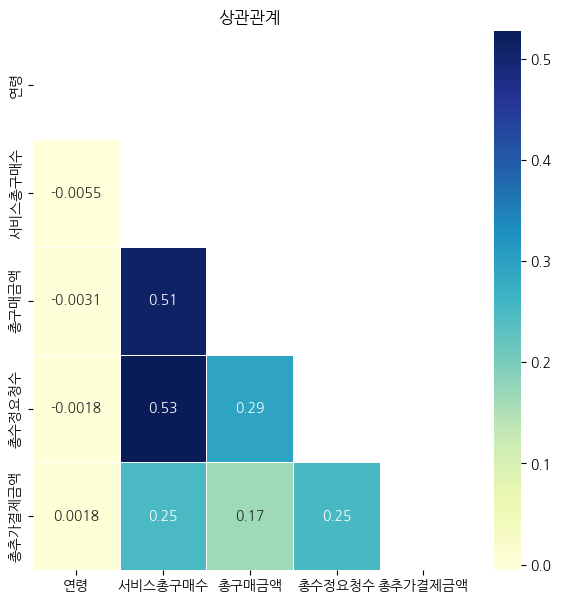

In [32]:
corr=drop_df[num_col].corr()

mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True

plt.figure(figsize=(7,7))
sns.heatmap(corr,annot=True,cmap='YlGnBu',linewidths=0.5,mask=mask)
plt.title('상관관계')
plt.show()

In [33]:
# 서비스 총 구매수와 총수정요청수는 양의 상관관계
# 서비스 총 구매수와 총구매금액은 양의 상관관계

### 연령대 변수 생성

In [34]:
drop_df['연령대']=drop_df['연령'].apply(lambda x:x//10*10)

In [35]:
drop_df['연령대'].value_counts()

연령대
20.0    82791
30.0    30995
40.0     7268
10.0     2452
50.0      446
60.0       24
80.0       14
Name: count, dtype: int64

<Axes: xlabel='연령대'>

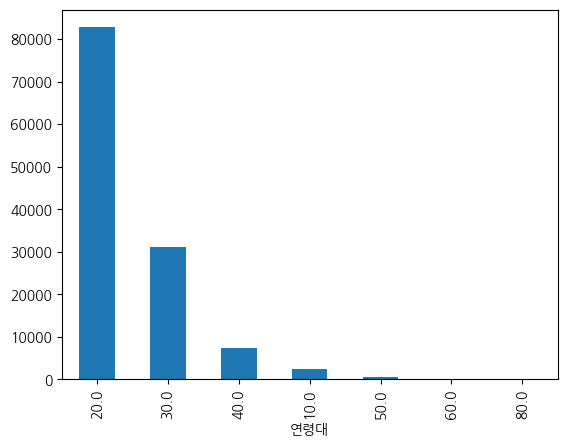

In [36]:
# 연령대

drop_df['연령대'].value_counts().plot.bar()

In [37]:
# 20대가 주요 고객

## 가설 검정

▶ 성별별로 서비스총구매수에 유의미한 차이가 있다.

In [38]:
# 성별별로 서비스총구매수에 유의미한 차이가 있다.

In [39]:
female=drop_df[drop_df['성별']=='여성']
male=drop_df[drop_df['성별']=='남성']

In [40]:
# 정규성 검정

import scipy.stats as stats

In [41]:
stats.normaltest(female['서비스총구매수'])

NormaltestResult(statistic=48980.81457861929, pvalue=0.0)

In [42]:
# pvalue<0.05 / 대립가설 채택 / 정규성 x

In [43]:
stats.normaltest(male['서비스총구매수'])

NormaltestResult(statistic=134312.09784042375, pvalue=0.0)

In [44]:
# pvalue<0.05 / 대립가설 채택 / 정규성 x

In [45]:
# 평균에 차이 있는지

stats.ranksums(female['서비스총구매수'],male['서비스총구매수'])

RanksumsResult(statistic=-0.14965944371010395, pvalue=0.8810333069518607)

In [46]:
# pvalue>0.0.5 / 귀무가설 채택 / 차이 없다.

In [47]:
female['서비스총구매수'].mean()

2.4746022971561943

In [48]:
male['서비스총구매수'].mean()

2.514711029443934

## 통계량 

In [57]:
# 성별별 데이터 통계량


drop_df.pivot_table(index='성별', values=num_col, aggfunc=['mean','median'])

mean                                                   median         
     서비스총구매수         연령          총구매금액    총수정요청수      총추가결제금액 서비스총구매수    연령   
성별                                                                            
남성  2.514711  27.717111  156888.882071  0.437308  9899.922671       1  26.0  \
여성  2.474602  27.724464  159388.631534  0.425057  9870.594005       1  26.0   

                            
      총구매금액 총수정요청수 총추가결제금액  
성별                          
남성  53500.0    0.0    4200  
여성  53600.0    0.0    4200

In [58]:
# 유입경로별 데이터 통계량

drop_df.pivot_table(index='유입경로', values=num_col,aggfunc=['mean','median'])

mean                                                    median   
         서비스총구매수         연령          총구매금액    총수정요청수       총추가결제금액 서비스총구매수   
유입경로                                                                         
검색광고    2.508327  27.775201  159719.129811  0.430353   9860.672245       1  \
구글광고    2.462963  27.830409  153500.539311  0.407797   9670.100715       1   
네이버블로그  2.551109  27.755056  157977.384117  0.438429   9809.912622       1   
네이버카페   2.419781  27.810962  149391.410665  0.395795  10022.911919       1   
뉴스광고    2.591045  27.800000  153498.388060  0.486567   9803.880597       1   
다음카페    2.522923  27.762178  152419.498567  0.520057   9686.819484       1   
유튜브     2.485690  27.656902  157533.802043  0.436525   9912.211246       1   
인스타그램   2.528273  27.707714  160732.377840  0.441249   9970.826933       1   
직접검색    2.559060  27.606078  173252.792431  0.493693  10214.793578       1   
페이스북    2.331041  27.773040  148712.815222  0.400963  10123.681797       1   

                                      
          연령    총구매금액 총수정요청수 총추가결제금액  
유입경로                                  
검색광고    26.0  53300.0    0.0    4200  
구글광고    26.0  54050.0    0.0    4500  
네이버블로그  26.0  53700.0    0.0    4200  
네이버카페   26.0  52800.0    0.0    4000  
뉴스광고    26.0  52600.0    0.0    5200  
다음카페    26.0  54850.0    0.0    3850  
유튜브     26.0  53000.0    0.0    4200  
인스타그램   26.0  55000.0    0.0    4300  
직접검색    26.0  55000.0    0.0    4500  
페이스북    26.0  54000.0    0.0    4200

In [56]:
# 연령대별 데이터 통계량

drop_df.pivot_table(index='연령대',values=num_col, aggfunc=['mean','median'])

mean                                                    median   
       서비스총구매수         연령          총구매금액    총수정요청수       총추가결제금액 서비스총구매수   
연령대                                                                        
10.0  2.504486  19.000000  158313.438010  0.402529   9643.898858       1  \
20.0  2.509886  24.274909  156608.297279  0.433303   9853.835224       1   
30.0  2.513212  33.332247  162469.864494  0.441700   9993.967414       1   
40.0  2.407815  44.194414  146361.007155  0.417694   9999.462025       1   
50.0  2.428251  52.663677  171098.721973  0.491031   9586.614350       1   
60.0  1.958333  64.000000  110202.500000  0.416667  10744.166667       2   
80.0  2.071429  85.000000  117650.000000  0.500000   7721.428571       2   

                                    
        연령    총구매금액 총수정요청수 총추가결제금액  
연령대                                 
10.0  19.0  53200.0    0.0    4150  
20.0  24.0  53400.0    0.0    4200  
30.0  33.0  54000.0    0.0    4200  
40.0  44.0  52900.0    0.0    4200  
50.0  52.0  48600.0    0.0    3350  
60.0  64.0  58230.0    0.0    6450  
80.0  85.0  40500.0    0.0    5800

In [55]:
# 거주지별 데이터 통계량

drop_df.pivot_table(index='거주지',values=num_col, aggfunc=['mean','median'])

mean                                                   median         
      서비스총구매수         연령          총구매금액    총수정요청수      총추가결제금액 서비스총구매수    연령   
거주지                                                                            
강원도  2.538102  27.659425  156228.599599  0.414773  9584.064171       1  26.0  \
경기도  2.541103  27.730912  159631.949387  0.455935  9941.519315       1  26.0   
경상도  2.466866  27.669962  152539.356506  0.420999  9981.788548       1  26.0   
서울시  2.470015  27.739113  156794.687443  0.420468  9878.172292       1  26.0   
전라도  2.500395  27.691855  159148.772516  0.419295  9728.485282       1  26.0   
제주도  2.457437  27.809167  155338.400374  0.461179  9137.605239       1  26.0   
충청도  2.526861  27.799059  163244.078700  0.428760  9804.551326       1  26.0   

                             
       총구매금액 총수정요청수 총추가결제금액  
거주지                          
강원도  52400.0    0.0    4200  
경기도  54700.0    0.0    4200  
경상도  53000.0    0.0    4200  
서울시  52700.0    0.0    4400  
전라도  53800.0    0.0    4200  
제주도  53800.0    0.0    3800  
충청도  52400.0    0.0    3900

In [54]:
# 회원상태별 데이터 통계량

drop_df.pivot_table(index='회원상태',values=num_col, aggfunc=['mean','median'])

mean                                                   median   
        서비스총구매수         연령          총구매금액    총수정요청수      총추가결제금액 서비스총구매수   
회원상태                                                                       
정상회원   2.509962  27.720079  158220.632442  0.435051  9905.525016       1  \
탈퇴     2.354065  27.672257  139346.419753  0.405544  9577.334032       1   
탈퇴처리중  2.260417  28.119792  144158.697917  0.474479  8651.822917       2   

                                     
         연령    총구매금액 총수정요청수 총추가결제금액  
회원상태                                 
정상회원   26.0  53600.0    0.0    4200  
탈퇴     26.0  52800.0    0.0    4400  
탈퇴처리중  26.0  59050.0    0.0    4250

# **Customer  + Log**

In [59]:
log_df=Log_Data02.copy()
log_df.head()

,거래일자,수수료율,고객ID,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,서비스명,판매자,판매금액,서비스가격,평점,이용자수,대분류,서비스번호
0,20210201,6.5,5030100140,0.0,9800,NaN,NaN,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,14800.0,5000.0,5.0,584.0,커머스,2102.0
1,20210201,6.5,8020105385,0.0,0,NaN,NaN,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,5000.0,5000.0,5.0,584.0,커머스,2102.0
2,20210201,6.5,110104033157,0.0,9200,NaN,NaN,"엑셀 VBA, 매크로, ERP 프로그램 개발해 드립니다.",엑셀의신,19200.0,10000.0,5.0,583.0,데이터,2103.0
3,20210201,7.5,40203001176,0.0,11000,NaN,NaN,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,61000.0,50000.0,5.0,504.0,데이터,2105.0
4,20210201,6.5,5041700297,0.0,0,NaN,NaN,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,50000.0,50000.0,5.0,504.0,데이터,2105.0


In [60]:
log_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344299 entries, 0 to 344298
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   거래일자      344299 non-null  int64  
 1   수수료율      344299 non-null  float64
 2   고객ID      344299 non-null  int64  
 3   프로그램수정횟수  344299 non-null  float64
 4   추가결제금액    344299 non-null  int64  
 5   거래취소여부    4597 non-null    float64
 6   거래취소일자    4597 non-null    float64
 7   서비스명      344277 non-null  object 
 8   판매자       344277 non-null  object 
 9   판매금액      344278 non-null  float64
 10  서비스가격     344277 non-null  float64
 11  평점        344277 non-null  float64
 12  이용자수      344277 non-null  float64
 13  대분류       344277 non-null  object 
 14  서비스번호     344277 non-null  float64
dtypes: float64(9), int64(3), object(3)
memory usage: 39.4+ MB


In [61]:
log_df.shape

(344299, 15)

In [62]:
log_df.isna().sum()

거래일자             0
수수료율             0
고객ID             0
프로그램수정횟수         0
추가결제금액           0
거래취소여부      339702
거래취소일자      339702
서비스명            22
판매자             22
판매금액            21
서비스가격           22
평점              22
이용자수            22
대분류             22
서비스번호           22
dtype: int64

In [63]:
log_df['거래취소여부']=log_df['거래취소여부'].fillna(0)
log_df['거래취소일자']=log_df['거래취소일자'].fillna(0)

In [64]:
log_df.dropna(inplace=True)

In [65]:
log_df.isna().sum()

거래일자        0
수수료율        0
고객ID        0
프로그램수정횟수    0
추가결제금액      0
거래취소여부      0
거래취소일자      0
서비스명        0
판매자         0
판매금액        0
서비스가격       0
평점          0
이용자수        0
대분류         0
서비스번호       0
dtype: int64

In [66]:
log_df[['거래일자']]

,거래일자
0,20210201
1,20210201
2,20210201
3,20210201
4,20210201
...,...
344294,20210630
344295,20210630
344296,20210630
344297,20210630


In [67]:
log_df.shape

(344277, 15)

In [68]:
log_df['거래일자']=log_df['거래일자'].astype('str')

In [69]:
log_df['연도']=log_df['거래일자'].apply(lambda x:x[:4])
log_df['월']=log_df['거래일자'].apply(lambda x:x[4:6])
log_df['일']=log_df['거래일자'].apply(lambda x:x[6:])

In [70]:
log_df['new_date']=log_df['연도']+'-'+log_df['월']+'-'+log_df['일']
log_df['new_date']=pd.to_datetime(log_df['new_date'])

In [71]:
log_df.head()

,거래일자,수수료율,고객ID,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,서비스명,판매자,판매금액,서비스가격,평점,이용자수,대분류,서비스번호,연도,월,일,new_date
0,20210201,6.5,5030100140,0.0,9800,0.0,0.0,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,14800.0,5000.0,5.0,584.0,커머스,2102.0,2021,02,01,2021-02-01
1,20210201,6.5,8020105385,0.0,0,0.0,0.0,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,5000.0,5000.0,5.0,584.0,커머스,2102.0,2021,02,01,2021-02-01
2,20210201,6.5,110104033157,0.0,9200,0.0,0.0,"엑셀 VBA, 매크로, ERP 프로그램 개발해 드립니다.",엑셀의신,19200.0,10000.0,5.0,583.0,데이터,2103.0,2021,02,01,2021-02-01
3,20210201,7.5,40203001176,0.0,11000,0.0,0.0,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,61000.0,50000.0,5.0,504.0,데이터,2105.0,2021,02,01,2021-02-01
4,20210201,6.5,5041700297,0.0,0,0.0,0.0,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,50000.0,50000.0,5.0,504.0,데이터,2105.0,2021,02,01,2021-02-01


In [72]:
log_df.drop(['거래일자'],axis=1,inplace=True)

In [73]:
log_df.describe()

,수수료율,고객ID,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,판매금액,서비스가격,평점,이용자수,서비스번호,new_date
count,344277.000000,3.442770e+05,344277.000000,3.442770e+05,344277.000000,3.442770e+05,3.442770e+05,3.442770e+05,344277.000000,344277.000000,344277.000000,344277
mean,6.950017,3.870705e+10,0.173591,3.998327e+03,0.013353,2.698610e+05,6.299248e+04,6.038945e+04,4.832186,54.798706,3034.824002,2021-04-01 17:00:35.918750976
min,6.500000,1.010102e+08,-1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,5.000000e+03,0.000000,0.000000,2102.000000,2021-01-02 00:00:00
25%,6.500000,6.030206e+09,0.000000,0.000000e+00,0.000000,0.000000e+00,1.000000e+04,9.000000e+03,5.000000,8.000000,2377.000000,2021-02-15 00:00:00
50%,6.500000,1.307050e+10,0.000000,0.000000e+00,0.000000,0.000000e+00,2.395000e+04,2.000000e+04,5.000000,22.000000,2788.000000,2021-04-01 00:00:00
75%,7.500000,6.040301e+10,0.000000,6.500000e+03,0.000000,0.000000e+00,5.000000e+04,5.000000e+04,5.000000,62.000000,3435.000000,2021-05-18 00:00:00
max,9.000000,1.501042e+11,119.000000,1.445200e+06,1.000000,2.021063e+07,4.400000e+07,4.400000e+07,5.000000,584.000000,6496.000000,2021-06-30 00:00:00
std,0.788998,3.659256e+10,0.722270,9.075070e+03,0.114780,2.319736e+06,2.568311e+05,2.575478e+05,0.809270,90.533001,857.273248,NaN


In [74]:
category_col=log_df.select_dtypes('object').columns
number_col=log_df.select_dtypes(['int64','float64']).columns

In [75]:
log_df.head()

,수수료율,고객ID,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,서비스명,판매자,판매금액,서비스가격,평점,이용자수,대분류,서비스번호,연도,월,일,new_date
0,6.5,5030100140,0.0,9800,0.0,0.0,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,14800.0,5000.0,5.0,584.0,커머스,2102.0,2021,02,01,2021-02-01
1,6.5,8020105385,0.0,0,0.0,0.0,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,5000.0,5000.0,5.0,584.0,커머스,2102.0,2021,02,01,2021-02-01
2,6.5,110104033157,0.0,9200,0.0,0.0,"엑셀 VBA, 매크로, ERP 프로그램 개발해 드립니다.",엑셀의신,19200.0,10000.0,5.0,583.0,데이터,2103.0,2021,02,01,2021-02-01
3,7.5,40203001176,0.0,11000,0.0,0.0,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,61000.0,50000.0,5.0,504.0,데이터,2105.0,2021,02,01,2021-02-01
4,6.5,5041700297,0.0,0,0.0,0.0,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,50000.0,50000.0,5.0,504.0,데이터,2105.0,2021,02,01,2021-02-01


In [76]:
import koreanize_matplotlib

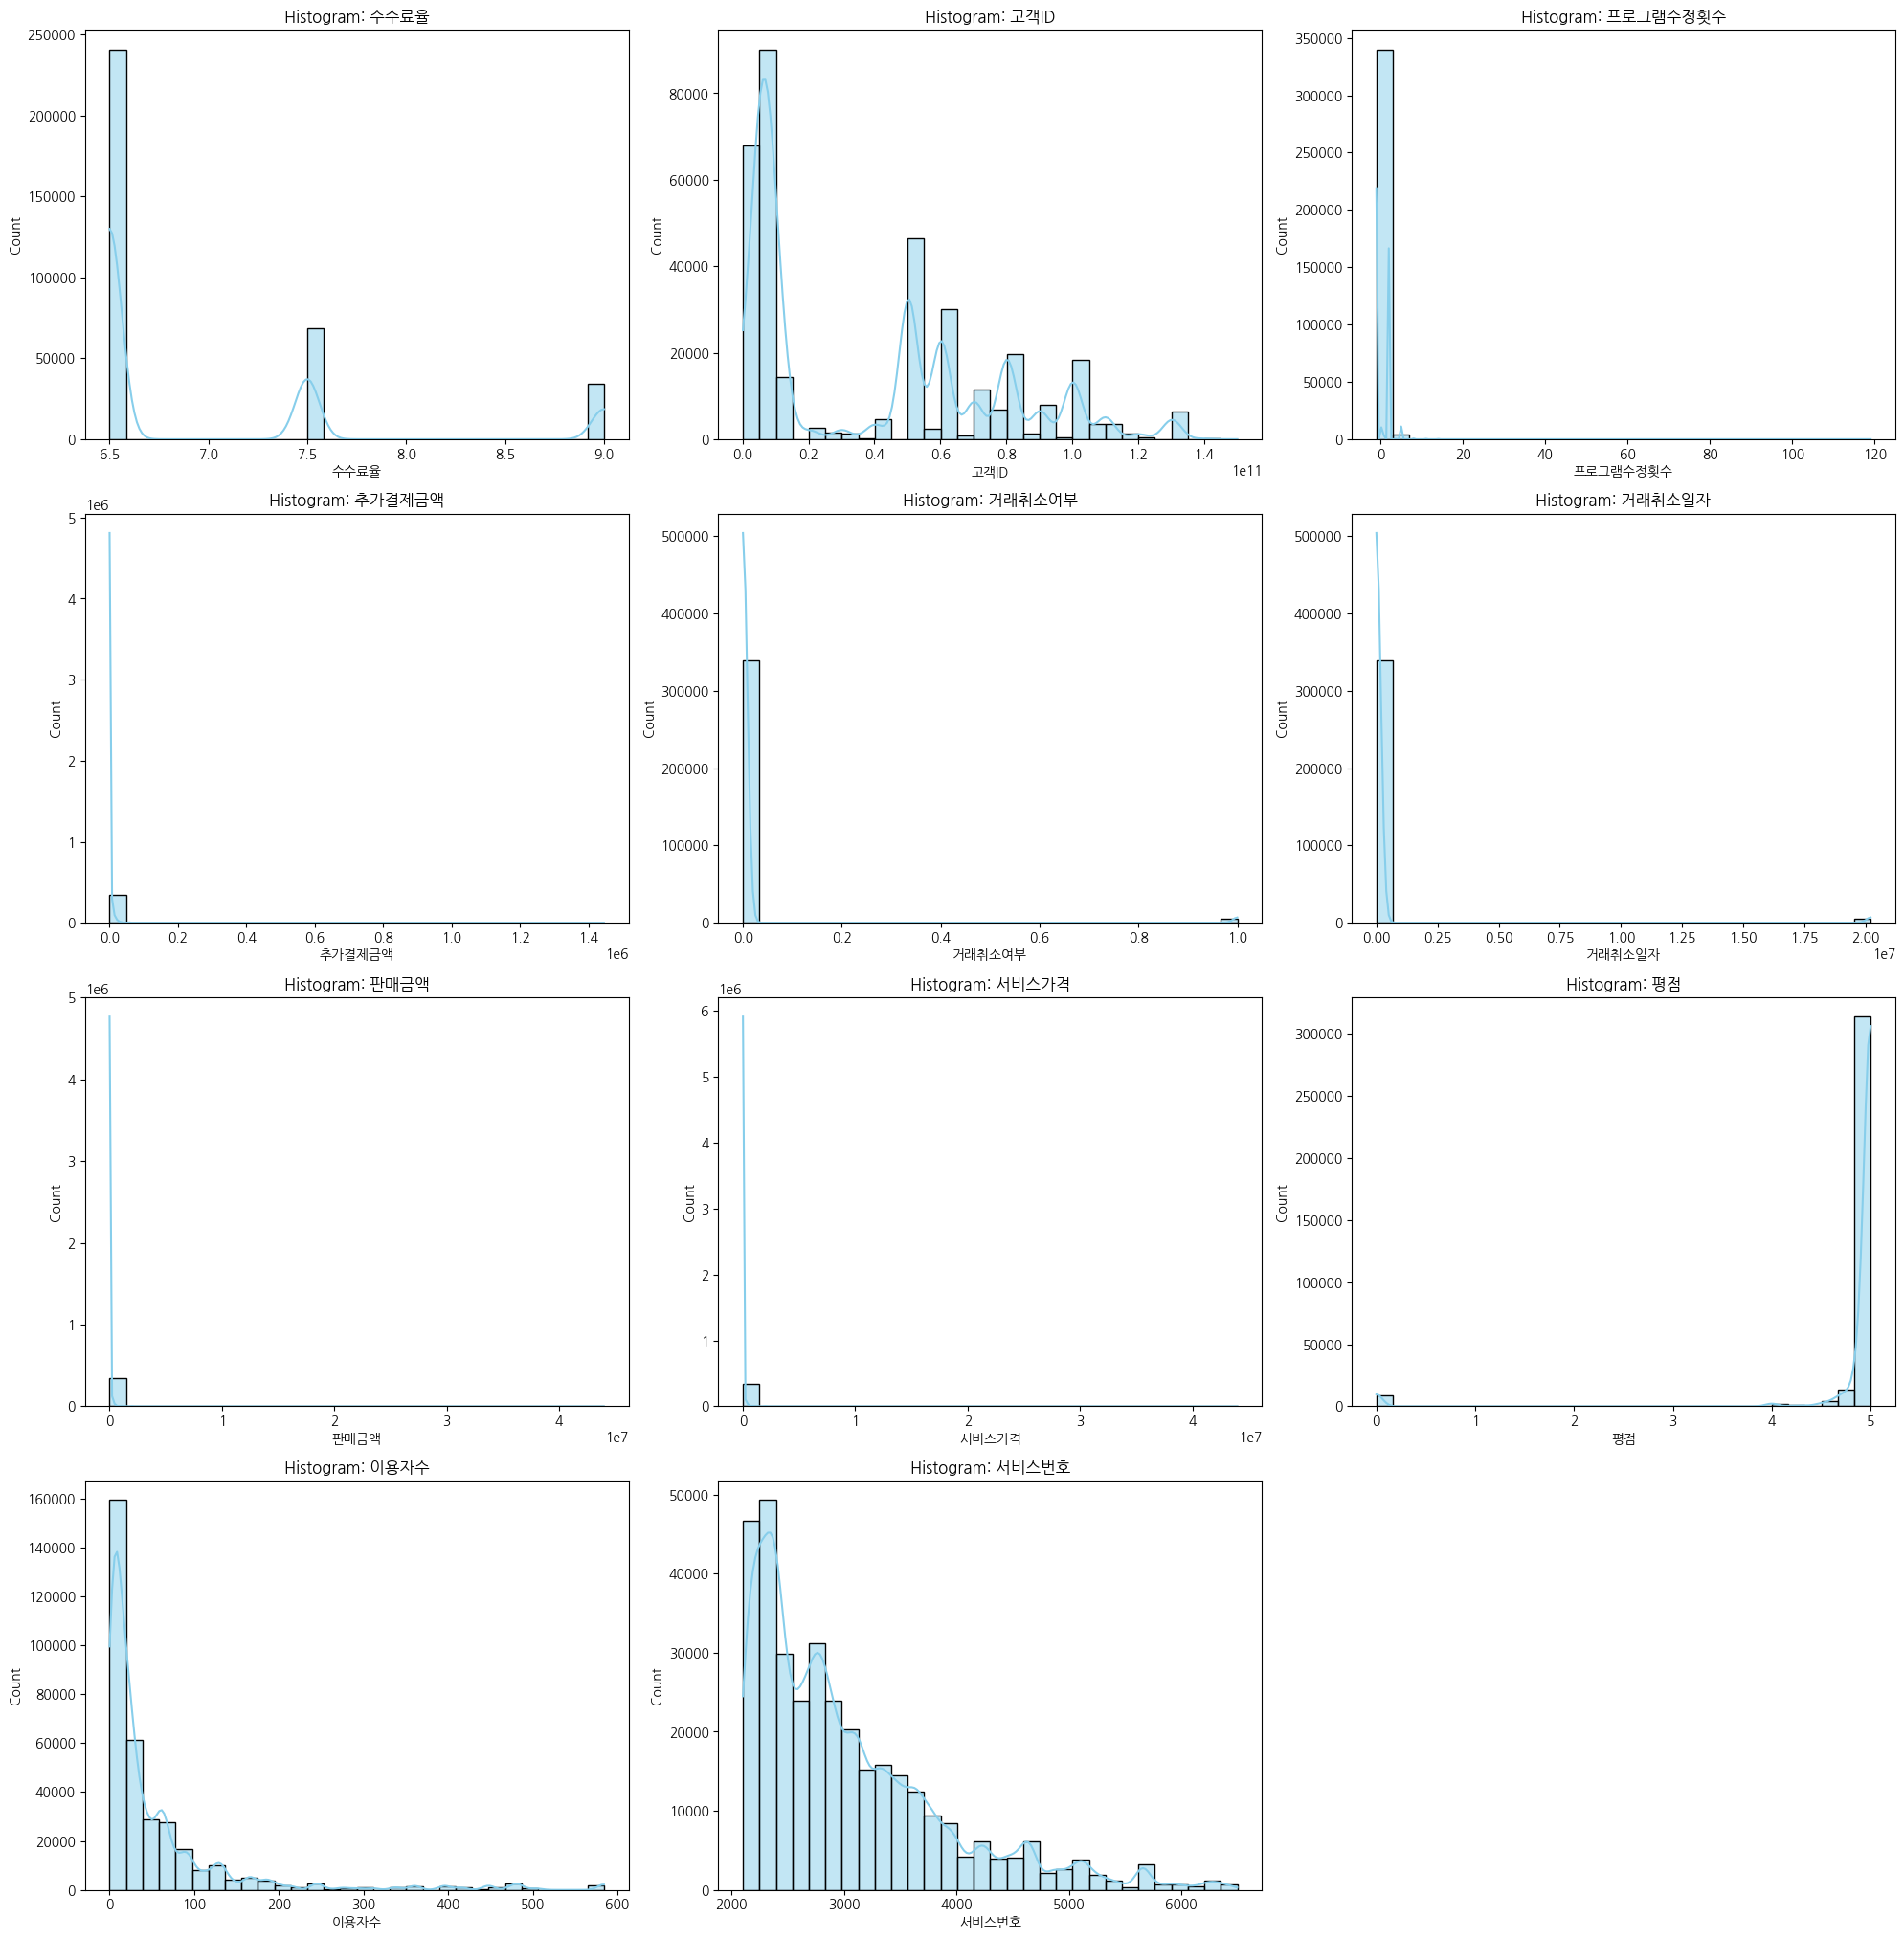

In [77]:
# 연속형 변수 그래프

plt.figure(figsize=(20, 25))


for i, feature in enumerate(number_col, 1):
    plt.subplot(5, 3, i)
    sns.histplot(log_df[feature], bins=30, kde=True, color='skyblue', edgecolor='black')
    plt.title("Histogram: " + feature)
    plt.xlabel(feature)

plt.tight_layout()

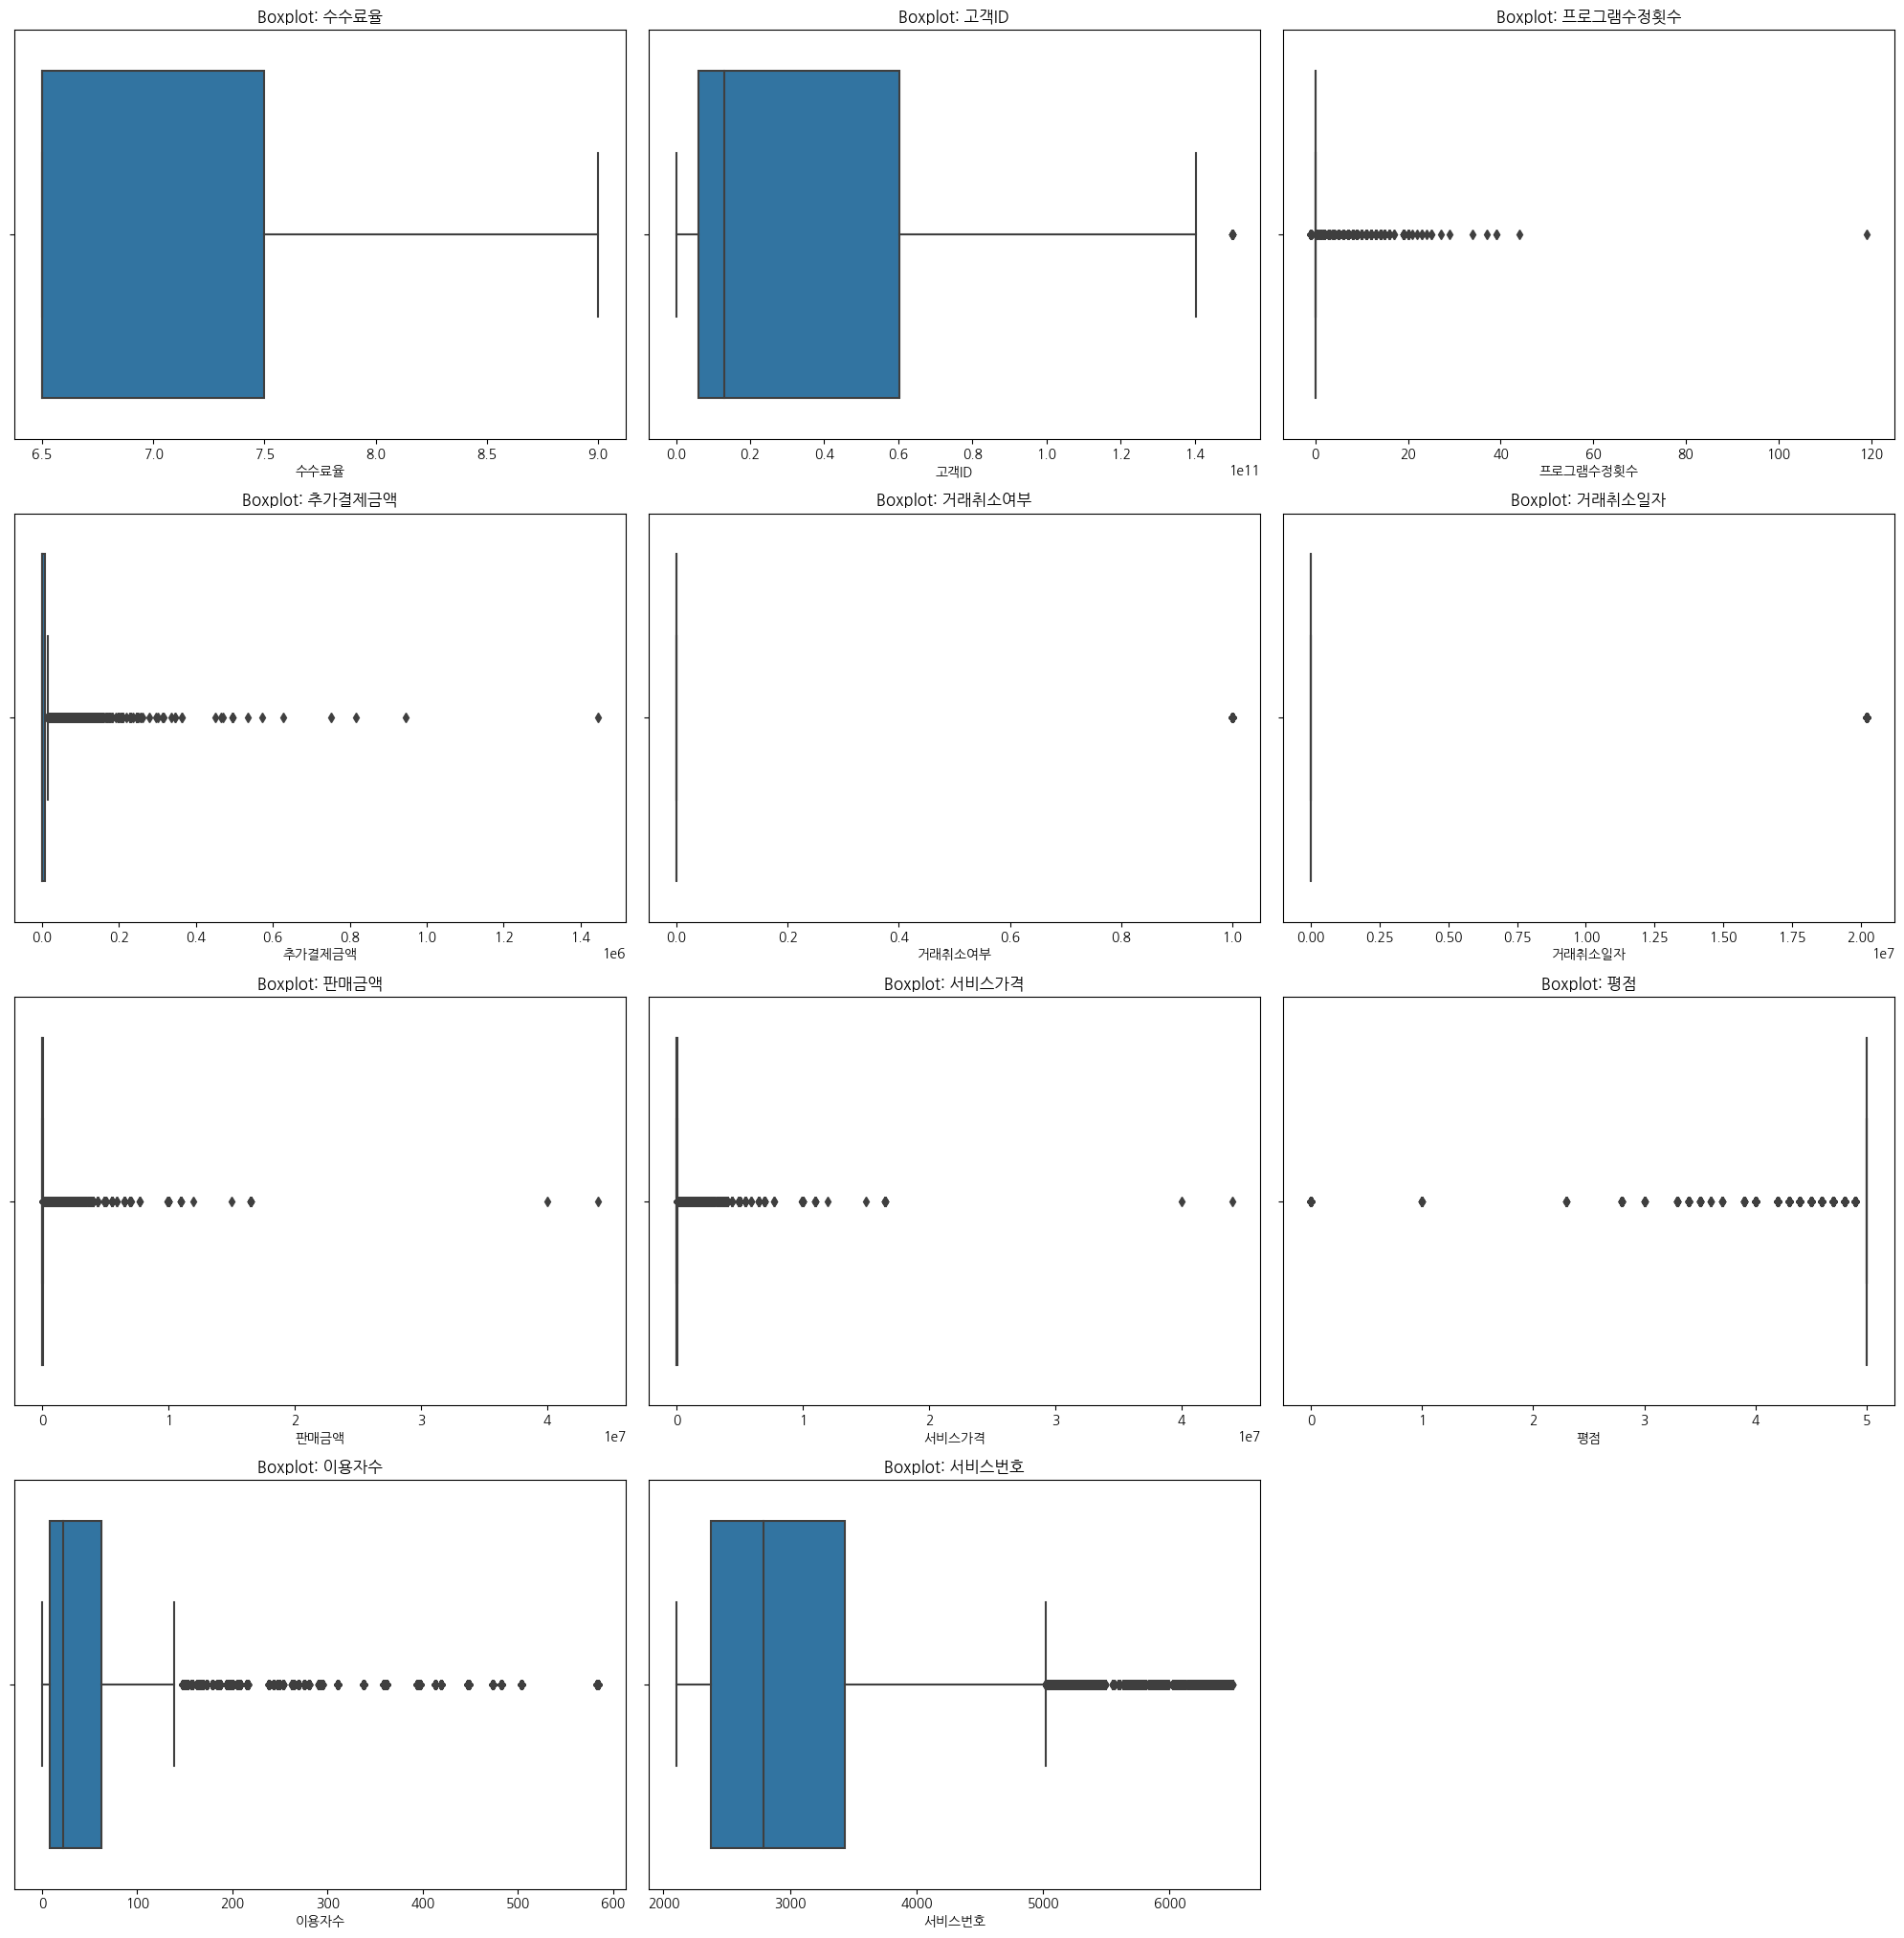

In [130]:
plt.figure(figsize=(20, 25))


for i, feature in enumerate(number_col, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(data=log_df, x=feature)
    plt.title("Boxplot: " + feature)
    plt.xlabel(feature)

plt.tight_layout()

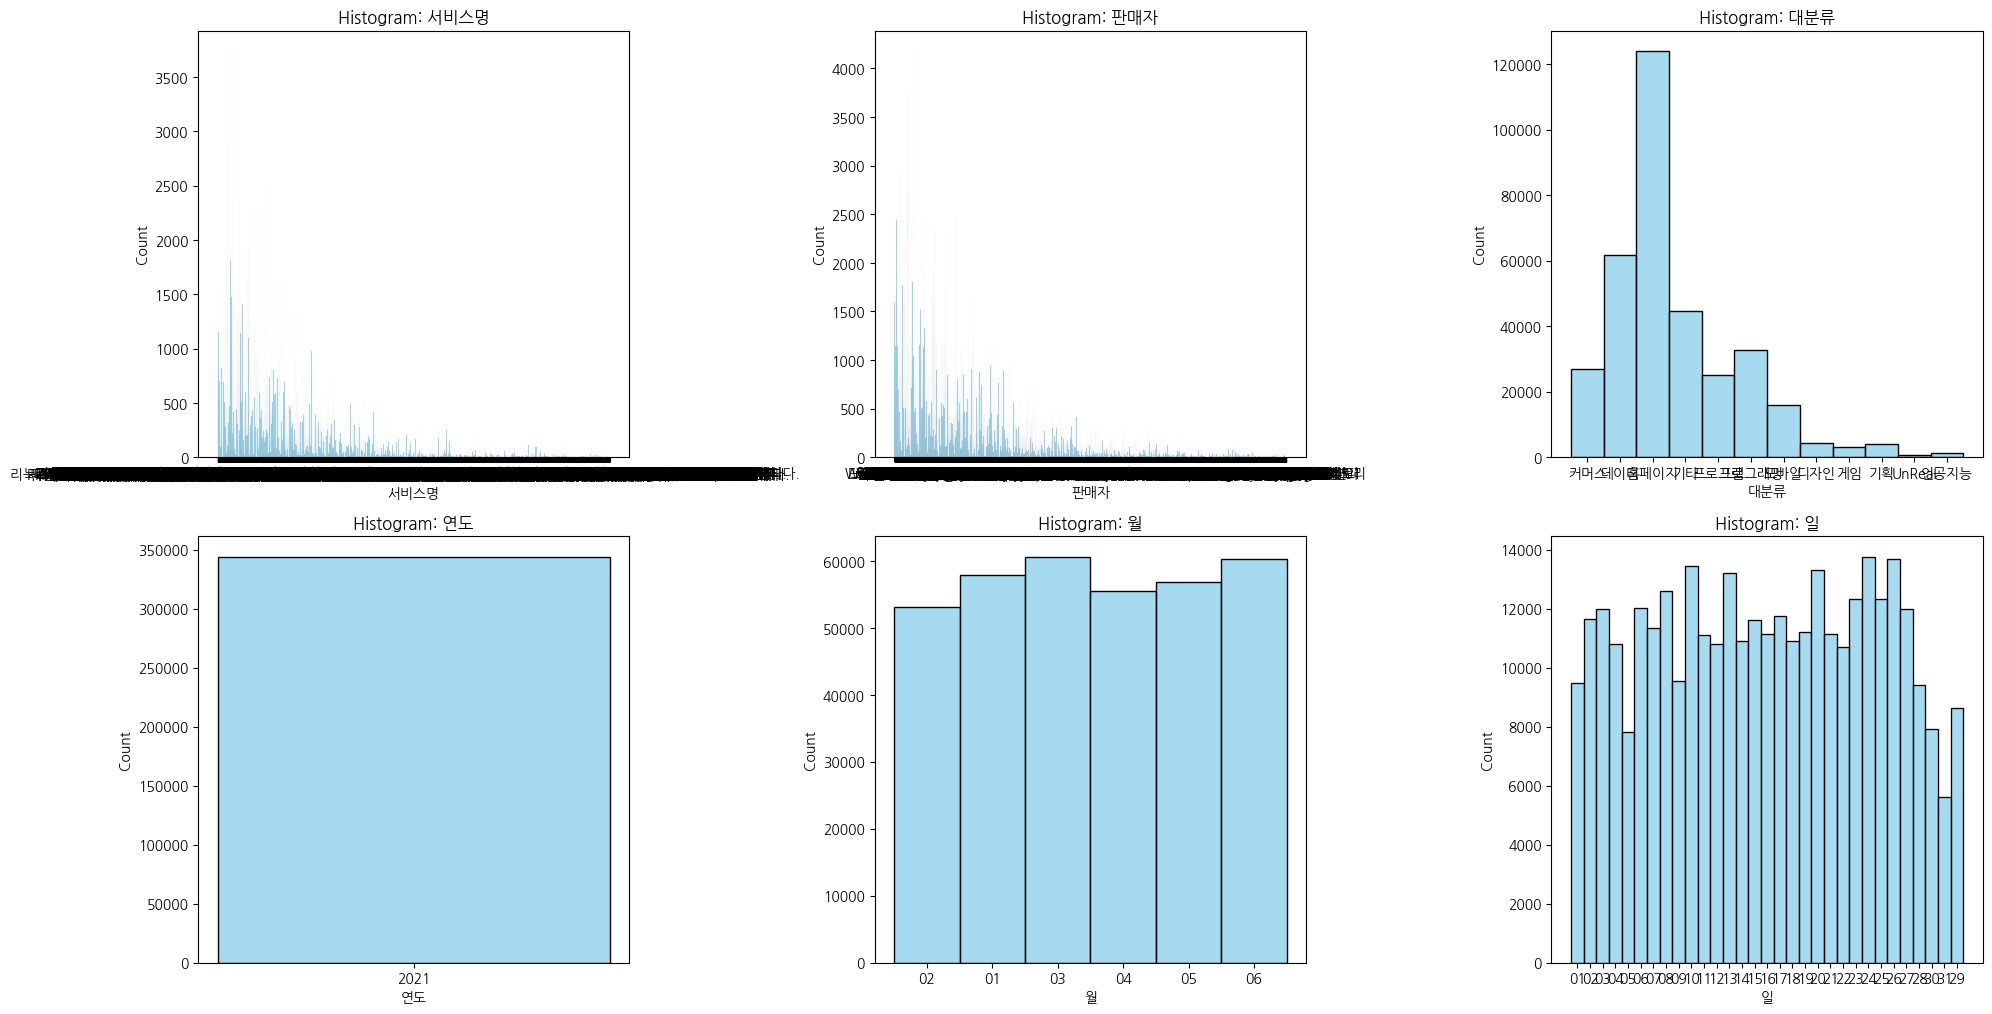

In [80]:
# 범주형 변수 그래프

plt.figure(figsize=(20, 25))


for i, feature in enumerate(category_col, 1):
    plt.subplot(5, 3, i)
    sns.histplot(log_df[feature], bins=30, color='skyblue', edgecolor='black')
    plt.title("Histogram: " + feature)
    plt.xlabel(feature)

plt.tight_layout()

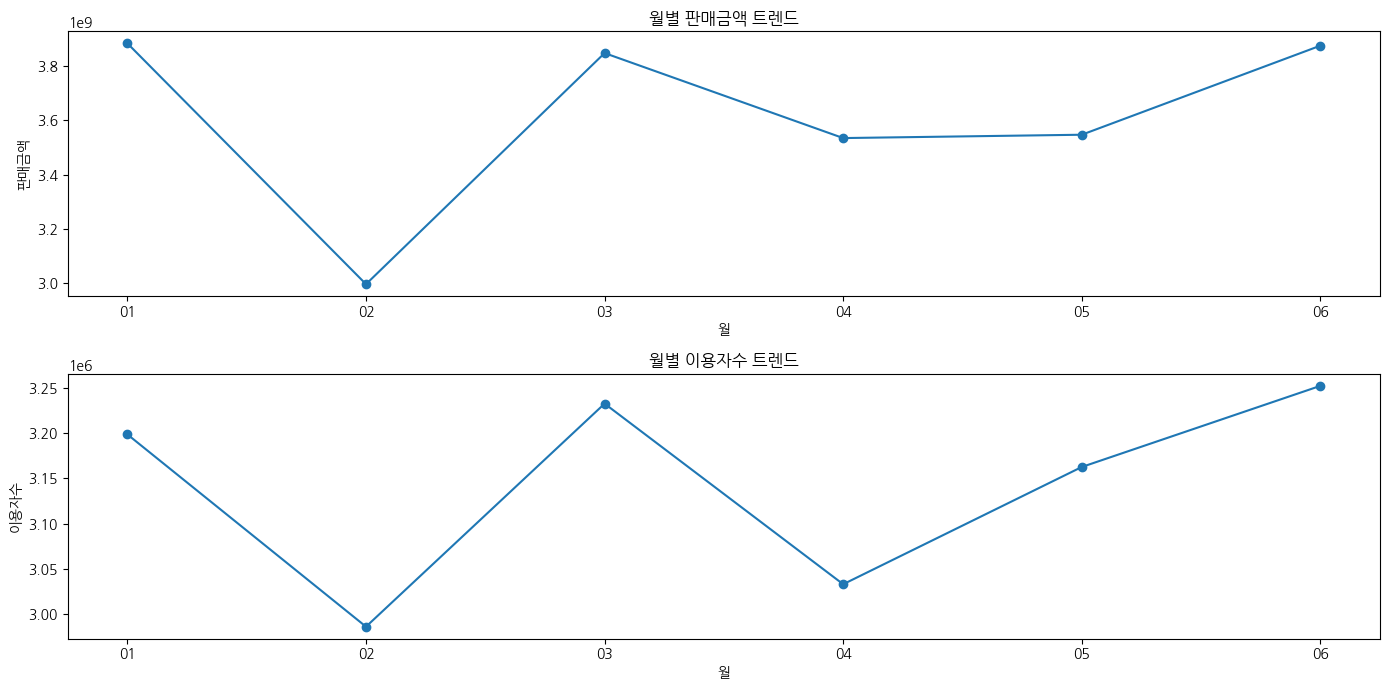

In [81]:
monthly_sales = log_df.groupby(['연도', '월'])['판매금액'].sum().reset_index()
monthly_users = log_df.groupby(['연도', '월'])['이용자수'].sum().reset_index()

# 시계열 그래프 생성
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(monthly_sales['월'], monthly_sales['판매금액'], marker='o', linestyle='-')
plt.title('월별 판매금액 트렌드')
plt.xlabel('월')
plt.ylabel('판매금액')

plt.subplot(2, 1, 2)
plt.plot(monthly_users['월'], monthly_users['이용자수'], marker='o', linestyle='-')
plt.title('월별 이용자수 트렌드')
plt.xlabel('월')
plt.ylabel('이용자수')

plt.tight_layout()
plt.show()

1. IT 아웃소싱 시장에서 외주를 의뢰하는 소비자의 서비스 니즈 파악을 통해 의뢰 고객들에게 차별화 서비스를 제공하고자 한다.  
2. 아웃소싱 전문가들과 구매 소비자들의 거래 성사율을 높이기 위한 차별화된 서비스 홍보를 하고자 한다.
3. 적절한 거래 수수료를 책정하여 소비자와 전문가의 거래가 지속적으로 이어질 수 있는 방안을 도출하고자 한다.

In [82]:
log_df.head()

,수수료율,고객ID,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,서비스명,판매자,판매금액,서비스가격,평점,이용자수,대분류,서비스번호,연도,월,일,new_date
0,6.5,5030100140,0.0,9800,0.0,0.0,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,14800.0,5000.0,5.0,584.0,커머스,2102.0,2021,02,01,2021-02-01
1,6.5,8020105385,0.0,0,0.0,0.0,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,5000.0,5000.0,5.0,584.0,커머스,2102.0,2021,02,01,2021-02-01
2,6.5,110104033157,0.0,9200,0.0,0.0,"엑셀 VBA, 매크로, ERP 프로그램 개발해 드립니다.",엑셀의신,19200.0,10000.0,5.0,583.0,데이터,2103.0,2021,02,01,2021-02-01
3,7.5,40203001176,0.0,11000,0.0,0.0,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,61000.0,50000.0,5.0,504.0,데이터,2105.0,2021,02,01,2021-02-01
4,6.5,5041700297,0.0,0,0.0,0.0,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,50000.0,50000.0,5.0,504.0,데이터,2105.0,2021,02,01,2021-02-01


In [83]:
log_df.describe()

,수수료율,고객ID,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,판매금액,서비스가격,평점,이용자수,서비스번호,new_date
count,344277.000000,3.442770e+05,344277.000000,3.442770e+05,344277.000000,3.442770e+05,3.442770e+05,3.442770e+05,344277.000000,344277.000000,344277.000000,344277
mean,6.950017,3.870705e+10,0.173591,3.998327e+03,0.013353,2.698610e+05,6.299248e+04,6.038945e+04,4.832186,54.798706,3034.824002,2021-04-01 17:00:35.918750976
min,6.500000,1.010102e+08,-1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,5.000000e+03,0.000000,0.000000,2102.000000,2021-01-02 00:00:00
25%,6.500000,6.030206e+09,0.000000,0.000000e+00,0.000000,0.000000e+00,1.000000e+04,9.000000e+03,5.000000,8.000000,2377.000000,2021-02-15 00:00:00
50%,6.500000,1.307050e+10,0.000000,0.000000e+00,0.000000,0.000000e+00,2.395000e+04,2.000000e+04,5.000000,22.000000,2788.000000,2021-04-01 00:00:00
75%,7.500000,6.040301e+10,0.000000,6.500000e+03,0.000000,0.000000e+00,5.000000e+04,5.000000e+04,5.000000,62.000000,3435.000000,2021-05-18 00:00:00
max,9.000000,1.501042e+11,119.000000,1.445200e+06,1.000000,2.021063e+07,4.400000e+07,4.400000e+07,5.000000,584.000000,6496.000000,2021-06-30 00:00:00
std,0.788998,3.659256e+10,0.722270,9.075070e+03,0.114780,2.319736e+06,2.568311e+05,2.575478e+05,0.809270,90.533001,857.273248,NaN


## 파생변수 생성

In [84]:
log_df['총매출'] = log_df['판매금액'] + log_df['추가결제금액']


In [85]:
log_df

,수수료율,고객ID,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,서비스명,판매자,판매금액,서비스가격,평점,이용자수,대분류,서비스번호,연도,월,일,new_date,총매출
0,6.5,5030100140,0.0,9800,0.0,0.0,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,14800.0,5000.0,5.0,584.0,커머스,2102.0,2021,02,01,2021-02-01,24600.0
1,6.5,8020105385,0.0,0,0.0,0.0,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,5000.0,5000.0,5.0,584.0,커머스,2102.0,2021,02,01,2021-02-01,5000.0
2,6.5,110104033157,0.0,9200,0.0,0.0,"엑셀 VBA, 매크로, ERP 프로그램 개발해 드립니다.",엑셀의신,19200.0,10000.0,5.0,583.0,데이터,2103.0,2021,02,01,2021-02-01,28400.0
3,7.5,40203001176,0.0,11000,0.0,0.0,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,61000.0,50000.0,5.0,504.0,데이터,2105.0,2021,02,01,2021-02-01,72000.0
4,6.5,5041700297,0.0,0,0.0,0.0,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,50000.0,50000.0,5.0,504.0,데이터,2105.0,2021,02,01,2021-02-01,50000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344294,9.0,50150001196,0.0,0,0.0,0.0,데이터 분석 및 시각화 제공해 드립니다.,전문가오리,20000.0,20000.0,4.6,33.0,데이터,2600.0,2021,06,30,2021-06-30,20000.0
344295,7.5,60107010137,0.0,0,0.0,0.0,데이터 분석 및 시각화 제공해 드립니다.,전문가오리,20000.0,20000.0,4.6,33.0,데이터,2600.0,2021,06,30,2021-06-30,20000.0
344296,9.0,70406002101,0.0,0,0.0,0.0,데이터 분석 및 시각화 제공해 드립니다.,전문가오리,20000.0,20000.0,4.6,33.0,데이터,2600.0,2021,06,30,2021-06-30,20000.0
344297,6.5,9010306354,0.0,0,0.0,0.0,데이터 분석 및 시각화 제공해 드립니다.,전문가오리,20000.0,20000.0,4.6,33.0,데이터,2600.0,2021,06,30,2021-06-30,20000.0


In [86]:
log_df[['서비스명']].value_counts().head(15)

서비스명                                
VBA 프로그램 , 엑셀 매크로 제작해 드립니다.             3738
리눅스 기술지원, 장애처리, 서버이전, 서버구축              3727
카페24,고도몰,메이크샵,모든쇼핑몰 수정,오류,문제해결          2851
생산,재고,급여,데이터 엑셀화로 업무의 효율을 높여 드립니다.      2729
고퀄리티의 퍼블리싱을 구현해 드립니다.                   2482
쇼핑몰에 카페24등 SNS 로그인 6종 연동해 드립니다          2344
홈페이지 수정, 이미지 및 텍스트 등 간단 수정              2273
카페24 쇼핑몰 기능제작 및 간단한 수정해 드립니다.           2270
뜯어보면서 공부할 수 있는 게임 기능을 만들어드립니다.          1983
퍼블리싱 HTML, CSS, JS, jQuery 코딩해 드립니다.    1946
VBA 막힐 때 물어보세요                          1918
엑셀 문서 작성해드립니다. VBA,매크로,파워쿼리             1904
모든 SQL 쿼리 개발 및 전환 을 도와 드립니다.            1890
포털 사이트 키워드 검색량 일별로 추출 및 분석해 드립니다.       1810
쇼핑몰배너 상세페이지 온라인배너 제작해 드립니다.             1767
Name: count, dtype: int64

In [ ]:
log_df[['서비스명']].nunique()

서비스명    2787
dtype: int64

In [ ]:
log_df['서비스명']

0           카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수
1           카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수
2         엑셀 VBA, 매크로, ERP 프로그램 개발해 드립니다.
3           엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍
4           엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍
                       ...               
344294             데이터 분석 및 시각화 제공해 드립니다.
344295             데이터 분석 및 시각화 제공해 드립니다.
344296             데이터 분석 및 시각화 제공해 드립니다.
344297             데이터 분석 및 시각화 제공해 드립니다.
344298             데이터 분석 및 시각화 제공해 드립니다.
Name: 서비스명, Length: 344299, dtype: object

In [ ]:
service_count=log_df['서비스명'].value_counts().reset_index()
service_count.columns=['서비스명','count']
service_count

,서비스명,count
0,"VBA 프로그램 , 엑셀 매크로 제작해 드립니다.",3738
1,"리눅스 기술지원, 장애처리, 서버이전, 서버구축",3727
2,"카페24,고도몰,메이크샵,모든쇼핑몰 수정,오류,문제해결",2851
3,"생산,재고,급여,데이터 엑셀화로 업무의 효율을 높여 드립니다.",2729
4,고퀄리티의 퍼블리싱을 구현해 드립니다.,2482
...,...,...
2782,카페24 쇼핑몰 디자인 작업해드립니다,1
2783,ML/AI Modeling 진행해드립니다.,1
2784,언리얼 상업 게임 개발해드립니다.,1
2785,반응형 랜딩페이지부터 원페이지까지 퍼블리싱해 드립니다.,1


In [ ]:
# 서비스명이 문장 형태, 키워드 형태가 혼합되어있어 체계적이지 않은 것 확인

In [87]:
# customer + log data 병합

merge_df=pd.merge(customer,Log_Data02,on='고객ID',how='right')

In [88]:
merge_df.head()

,고객ID,사용기기,사용OS,유입경로,회원상태,거주지,연령,성별,서비스총구매수,총구매금액,...,거래취소여부,거래취소일자,서비스명,판매자,판매금액,서비스가격,평점,이용자수,대분류,서비스번호
0,5030100140,iPhone,iOS11.4.1,유튜브,정상회원,경상도,20.0,남성,8,250400.0,...,NaN,NaN,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,14800.0,5000.0,5.0,584.0,커머스,2102.0
1,8020105385,SM-N950N,Android7.1.1,인스타그램,정상회원,경기도,27.0,남성,3,60000.0,...,NaN,NaN,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,5000.0,5000.0,5.0,584.0,커머스,2102.0
2,110104033157,iPhone,iOS11.4.1,유튜브,정상회원,경기도,29.0,남성,1,19200.0,...,NaN,NaN,"엑셀 VBA, 매크로, ERP 프로그램 개발해 드립니다.",엑셀의신,19200.0,10000.0,5.0,583.0,데이터,2103.0
3,40203001176,iPhone,iOS11.0.3,유튜브,정상회원,전라도,20.0,NaN,5,645000.0,...,NaN,NaN,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,61000.0,50000.0,5.0,504.0,데이터,2105.0
4,5041700297,iPhone,iOS11.4.1,네이버블로그,정상회원,제주도,32.0,남성,6,203000.0,...,NaN,NaN,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,50000.0,50000.0,5.0,504.0,데이터,2105.0
